
# Projet 2

In [1]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [2]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

1. *Ajout d'une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.*

In [3]:
geo['CP Ville'] = geo['Code Postal']+' '+geo['Commune']
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273,01330 AMBERIEUX-EN-DOMBES
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320,01300 AMBLEON


2. *Ecriture d'une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.*

2. *a. Définition de fonctions utilitaires permettant de décomposer les calculs*

In [5]:
def deg2rad(dd):
    """Convertit un angle "degrés décimaux" en "radians"
    """
    return dd/180*pi

2. *b. Fonctions de calcul de la distance entre 2 points*

In [6]:
from math import sin, cos, acos, pi

def distanceGPSRad(latA, longA, latB, longB):
    """Retourne la distance en mètres entre les 2 points A et B connus grâce à
       leurs coordonnées GPS (en radians).
    """
    # Rayon de la terre en mètres (sphère IAG-GRS80)
    RT = 6378137
    # angle en radians entre les 2 points
    S = acos(sin(latA)*sin(latB) + cos(latA)*cos(latB)*cos(abs(longB-longA)))
    # distance entre les 2 points, comptée sur un arc de grand cercle
    return int(S*RT)

def distanceGPSdd(latA, longA, latB, longB):
    """Retourne la distance en mètres entre les 2 points A et B connus grâce à
       leurs coordonnées GPS (en dd).
    """
    latARad = deg2rad(latA)
    longARad = deg2rad(longA)
    latBRad = deg2rad(latB)
    longBRad = deg2rad(longB)
    return distanceGPSRad(latARad, longARad, latBRad, longBRad)
    

2. *c. Fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.*

In [7]:
# fonction recherche de ville
def ville(lat, long):
    # Creation dans geo de 3 colonnes temporaires lat_pt, long_pt et Distance_au_pt
    geo['lat_pt'] = lat
    geo['long_pt'] = long
    geo['Distance_au_pt'] = 0
    
    for i, row in geo.iterrows():
        #geo.iloc['Distance_au_pt'][i] = distanceGPSdd(row['Latitude'], row['Longitude'], row['lat_pt'], row['long_pt'])
        geo.at[i, 'Distance_au_pt'] = distanceGPSdd(row['Latitude'], row['Longitude'], row['lat_pt'], row['long_pt'])    

    geo.drop(['lat_pt', 'long_pt'], axis=1, inplace=True)    
    
    ville_recherchee = geo.loc[geo['Distance_au_pt'] == geo['Distance_au_pt'].min()]
    
    geo.drop('Distance_au_pt', axis=1, inplace=True)  
    
    return ville_recherchee
    

In [8]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random

np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a


ville_recherchee = ville(lat, long)
ville_recherchee

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,Distance_au_pt
Code INSEE,,,,,,,,,,,,,,
71044,71330,BOSJEAN,SAONE-ET-LOIRE,BOURGOGNE,Commune simple,202.0,1862.0,0.3,"46.7696786287, 5.34727924927","{""type"": ""Polygon"", ""coordinates"": [[[5.345021...",46.769679,5.347279,71330 BOSJEAN,436


3. *Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).*

In [9]:
def dms2dec(deg, mn, sec):
    """Convertit un angle "degrés minutes secondes" en "degrés décimaux"
    """
    return deg + mn / 60 + sec / 3600

In [10]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,Distance_au_pt
Code INSEE,,,,,,,,,,,,,,
91477,91120,PALAISEAU,ESSONNE,ILE-DE-FRANCE,Sous-préfecture,118.0,1168.0,30.3,"48.7146765876, 2.22881488083","{""type"": ""Polygon"", ""coordinates"": [[[2.259350...",48.714677,2.228815,91120 PALAISEAU,1250


**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [13]:
geo.head(3)

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville
Code INSEE,,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114,01400 L'ABERGEMENT-CLEMENCIAT
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017,01640 L'ABERGEMENT-DE-VAREY
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926,01500 AMBERIEU-EN-BUGEY


1. *Utiliser la librairie Python json pour parser la colonne "geo_shape".*

In [14]:
import json

# Pas compris ce qu'il fallait faire exactement

2. *Donner le décompte des valeurs accédées avec la clé "type".*

In [24]:
list_of_types = [json.loads(i).get('type') for i in geo['geo_shape']]
set_of_types = set(list_of_types)

In [25]:
for typ in set_of_types:
    print(typ, ":", list_of_types.count(typ))

Polygon : 36670
MultiPolygon : 72


3. *Donner le décompte des longueurs des listes accédées avec la clé "coordinates".*

In [23]:
list_of_coordinates_length = [len(json.loads(i).get('coordinates')) for i in geo['geo_shape']]
print(set(list_of_coordinates_length))

{1, 2, 3, 4}


4. *Quelle commune est la plus complexe géométriquement ?*

In [33]:
geo['geo_shape_type'] = list_of_types
geo['geo_shape_complexity'] = list_of_coordinates_length
geo.loc[(geo['geo_shape_complexity'] == geo['geo_shape_complexity'].max())]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,geo_shape_type,geo_shape_complexity
Code INSEE,,,,,,,,,,,,,,,
83069,83400,HYERES,VAR,PROVENCE-ALPES-COTE D'AZUR,Chef-lieu canton,60.0,13356.0,54.7,"43.1018713534, 6.18898508469","{""type"": ""MultiPolygon"", ""coordinates"": [[[[6....",43.101871,6.188985,83400 HYERES,MultiPolygon,4


5. *Quelle commune est la seconde la plus complexe géométriquement ?*

In [39]:
geo.loc[(geo['geo_shape_complexity'] == (geo['geo_shape_complexity'].max()-1))]

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude,CP Ville,geo_shape_type,geo_shape_complexity
Code INSEE,,,,,,,,,,,,,,,
27701,27100,VAL-DE-REUIL,EURE,HAUTE-NORMANDIE,Chef-lieu canton,23.0,2593.0,13.5,"49.261335704, 1.21147195365","{""type"": ""MultiPolygon"", ""coordinates"": [[[[1....",49.261336,1.211472,27100 VAL-DE-REUIL,MultiPolygon,3


6. *Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?*

In [47]:
villes_poly_2 = geo.loc[(geo['geo_shape_type'] == 'Polygon') & (geo['geo_shape_complexity'] == 2)]['Commune']
villes_poly_2

Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

7. *Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.*

In [53]:
geo['geo_shape_coordinates'] = [json.loads(i).get('coordinates') for i in geo['geo_shape']]
coordinates_poly_2 = geo.loc[(geo['geo_shape_type'] == 'Polygon') & (geo['geo_shape_complexity'] == 2), 'geo_shape_coordinates']
coordinates_poly_2

Code INSEE
02232    [[[3.037897560658703, 49.16921270775551], [3.0...
05052    [[[6.719912606601575, 44.70392733592357], [6.7...
09042    [[[1.423960819701936, 42.99550854650971], [1.4...
22209    [[[-2.11237709725211, 48.52896113651634], [-2....
2A272    [[[8.940487655060174, 41.490088793265336], [8....
2B049    [[[8.911220447280732, 42.41019895400797], [8.8...
48080    [[[3.850531831651621, 44.68745054452225], [3.8...
67486    [[[7.594939251325704, 48.23228567615893], [7.5...
68078    [[[7.281156117554148, 48.02598189605906], [7.2...
71028    [[[5.416652515196548, 46.826781866293906], [5....
Name: geo_shape_coordinates, dtype: object

In [64]:
list_coordinates_poly_2 = list(coordinates_poly_2)

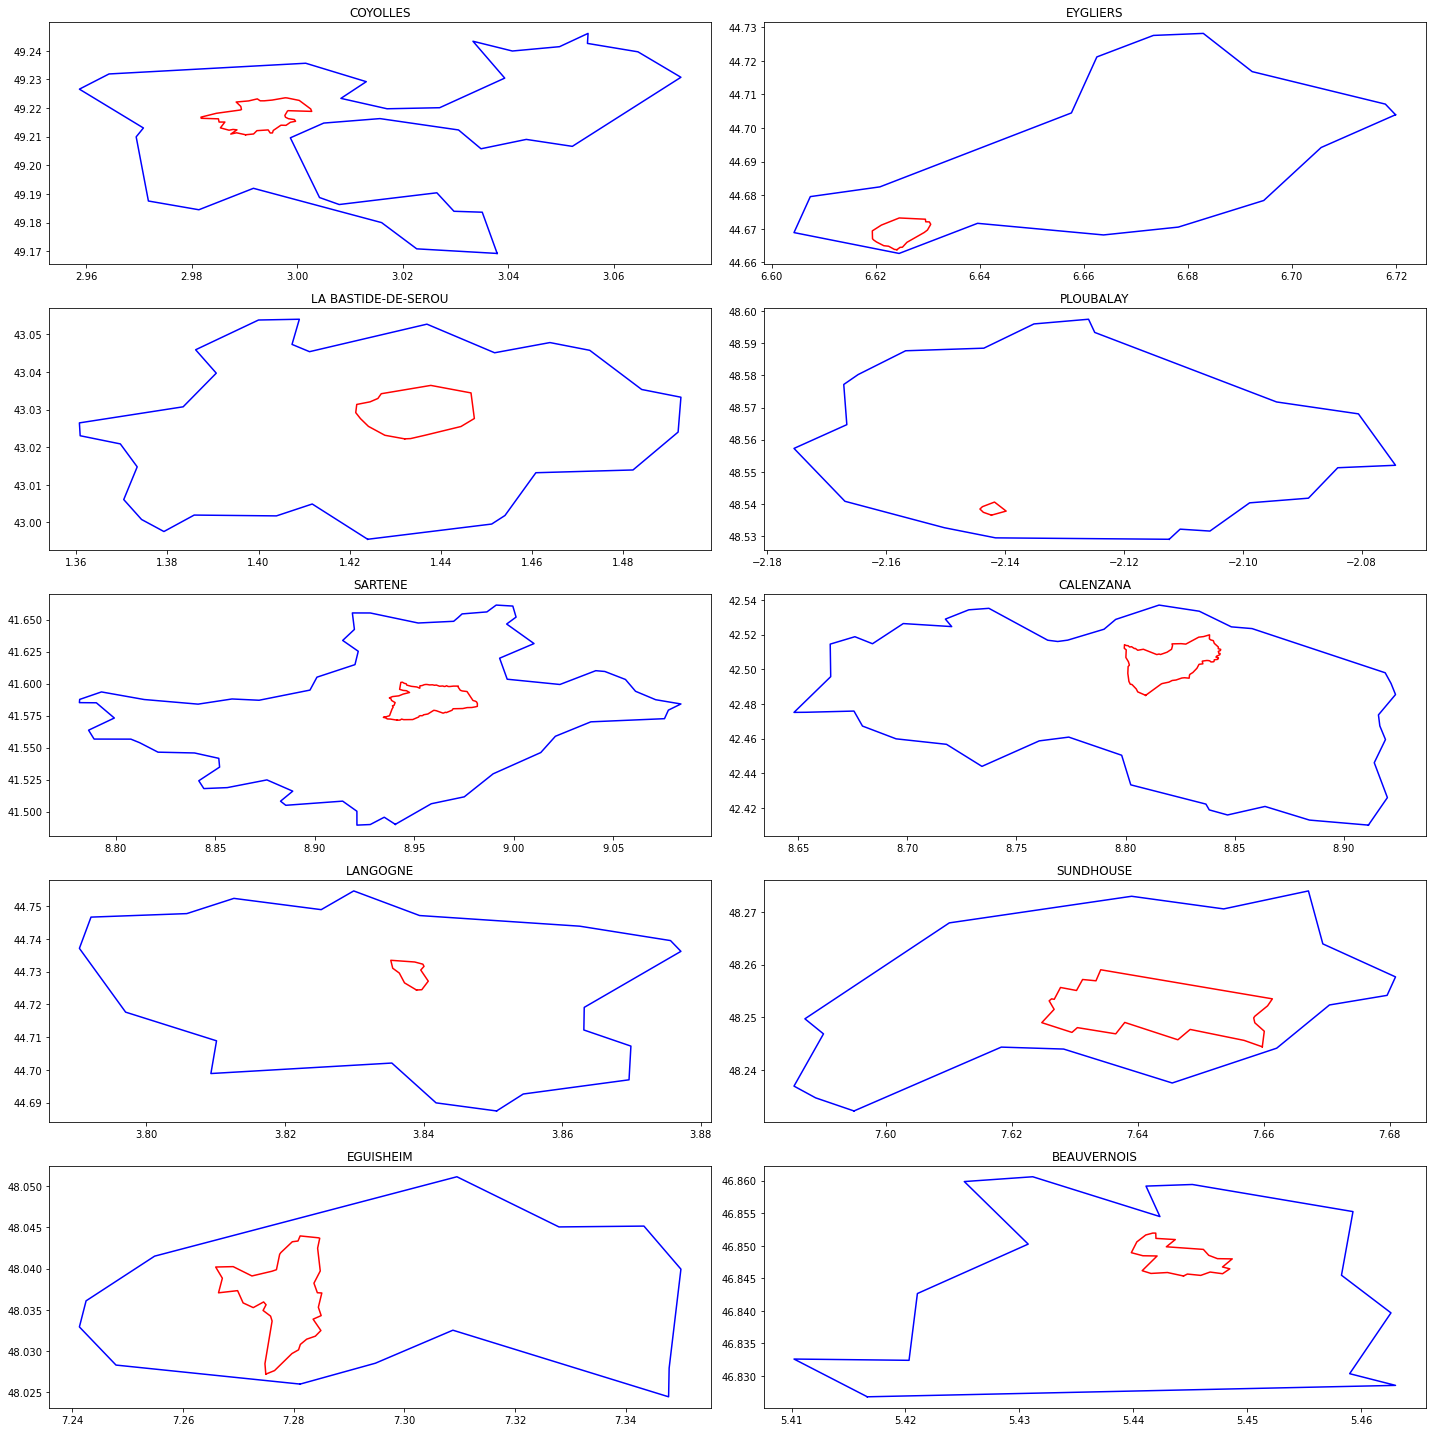

In [102]:
# >conda install -c conda-forge shapely

from shapely.geometry import Polygon
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

poly1 = []
poly2 = []

for i in range(len(list_coordinates_poly_2)):
    plt.subplot(5, 2, i+1)    
    poly1.append(Polygon([[point[0], point[1]] for point in list_coordinates_poly_2[i][0]]))
    poly2.append(Polygon([[point[0], point[1]] for point in list_coordinates_poly_2[i][1]]))
    plt.plot(*poly1[i].exterior.xy, c="blue")
    plt.plot(*poly2[i].exterior.xy, c="red")
    plt.title( geo.loc[((geo['geo_shape_type'] == 'Polygon') & (geo['geo_shape_complexity'] == 2)), 'Commune'][i] )

plt.show()